In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Problem statement:-** The dataset contains factor affecting placements in the college.
**Data columns**:-

1)sl_no	:- Serial Number

2)gender:- Male or Female

3)ssc_p	:- SSC percentage

4)ssc_b	:- SSC board

4)hsc_p	:- HSC percentage

5)hsc_b	:- HSC board

6)hsc_s :- HSC specialization

7)degree_p	:- Degree percentage

8)degree_t	:- Degree specialization

9)workex	:- work experience

10)etest_p :- Etest percentage

11)specialisation	

12)mba_p:-MBA percentage

13)status:- placed or not placed

14)salary


In [81]:
df=pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [82]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [83]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [84]:
df.shape

(215, 15)

**Heatmap**

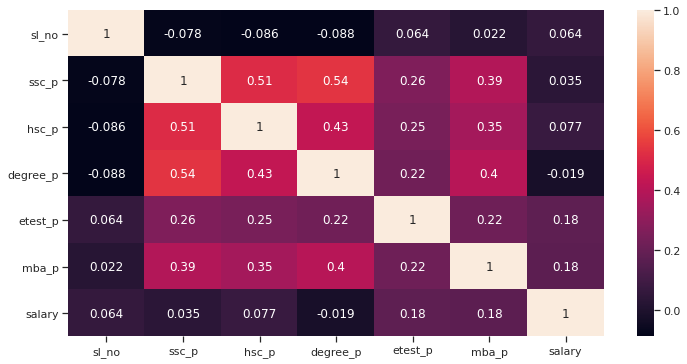

In [85]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)

**Box plot**

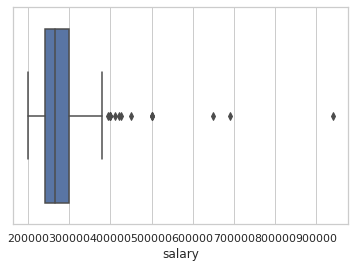

In [86]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["salary"])

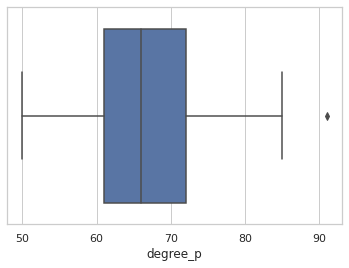

In [87]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["degree_p"])

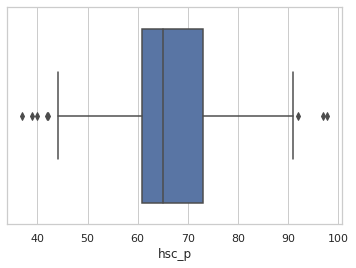

In [88]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["hsc_p"])

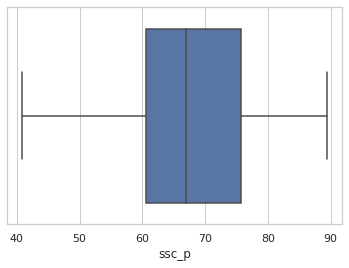

In [89]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["ssc_p"])

**Countplot**

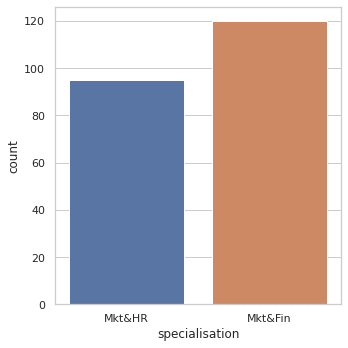

In [90]:
fig=plt.figure(figsize=(5,5))
sns.countplot('specialisation',data=df )
plt.tight_layout()
plt.show()

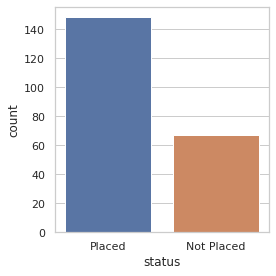

In [91]:
fig=plt.figure(figsize=(4,4))
sns.countplot('status',data=df )
plt.tight_layout()
plt.show()

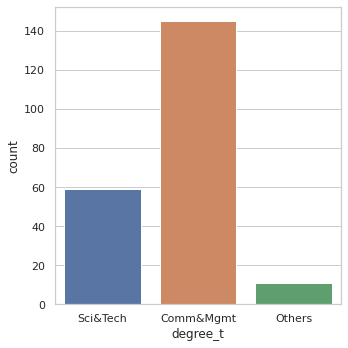

In [92]:
fig=plt.figure(figsize=(5,5))
sns.countplot('degree_t',data=df )
plt.tight_layout()
plt.show()

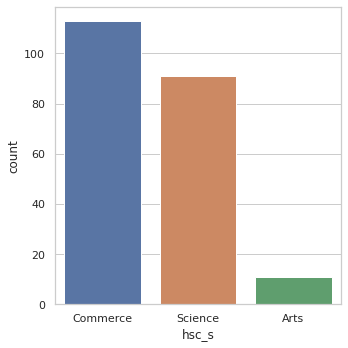

In [93]:
fig=plt.figure(figsize=(5,5))
sns.countplot('hsc_s',data=df )
plt.tight_layout()
plt.show()

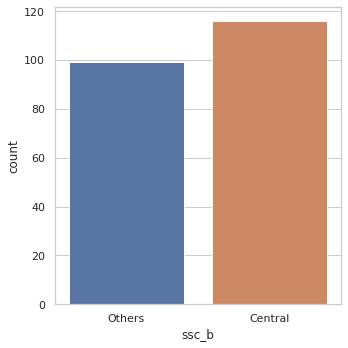

In [94]:
fig=plt.figure(figsize=(5,5))
sns.countplot('ssc_b',data=df )
plt.tight_layout()
plt.show()

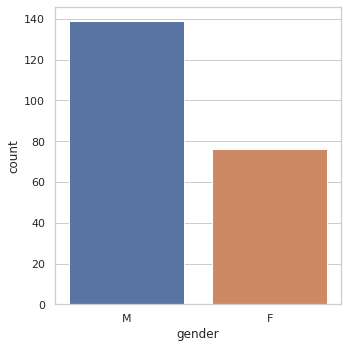

In [95]:
fig=plt.figure(figsize=(5,5))
sns.countplot('gender',data=df )
plt.tight_layout()
plt.show()

**Distplot**

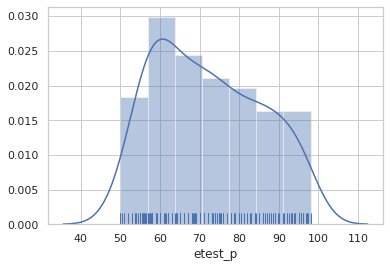

In [96]:
ax = sns.distplot(df['etest_p'], rug=True, hist=True)

**Violinplot**

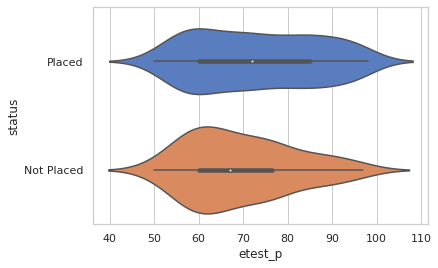

In [97]:
ax = sns.violinplot(x="etest_p", y="status", data=df, palette="muted")

**Histogram**

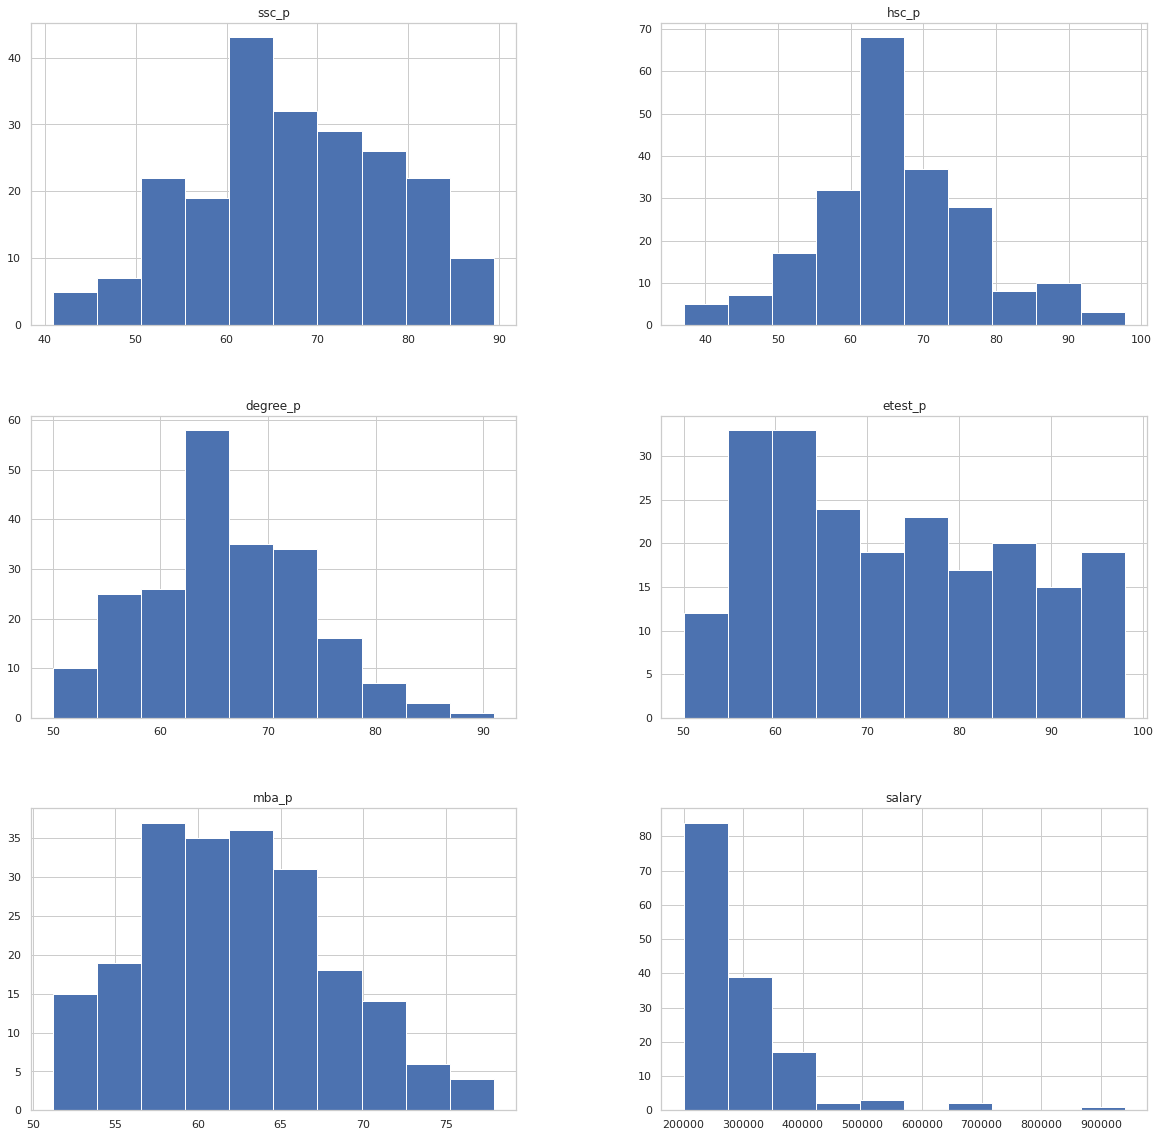

In [98]:
df1=df.drop(['sl_no'], axis=1)
df1.hist (bins=10,figsize=(20,20))
plt.show ()

**Pairplot**

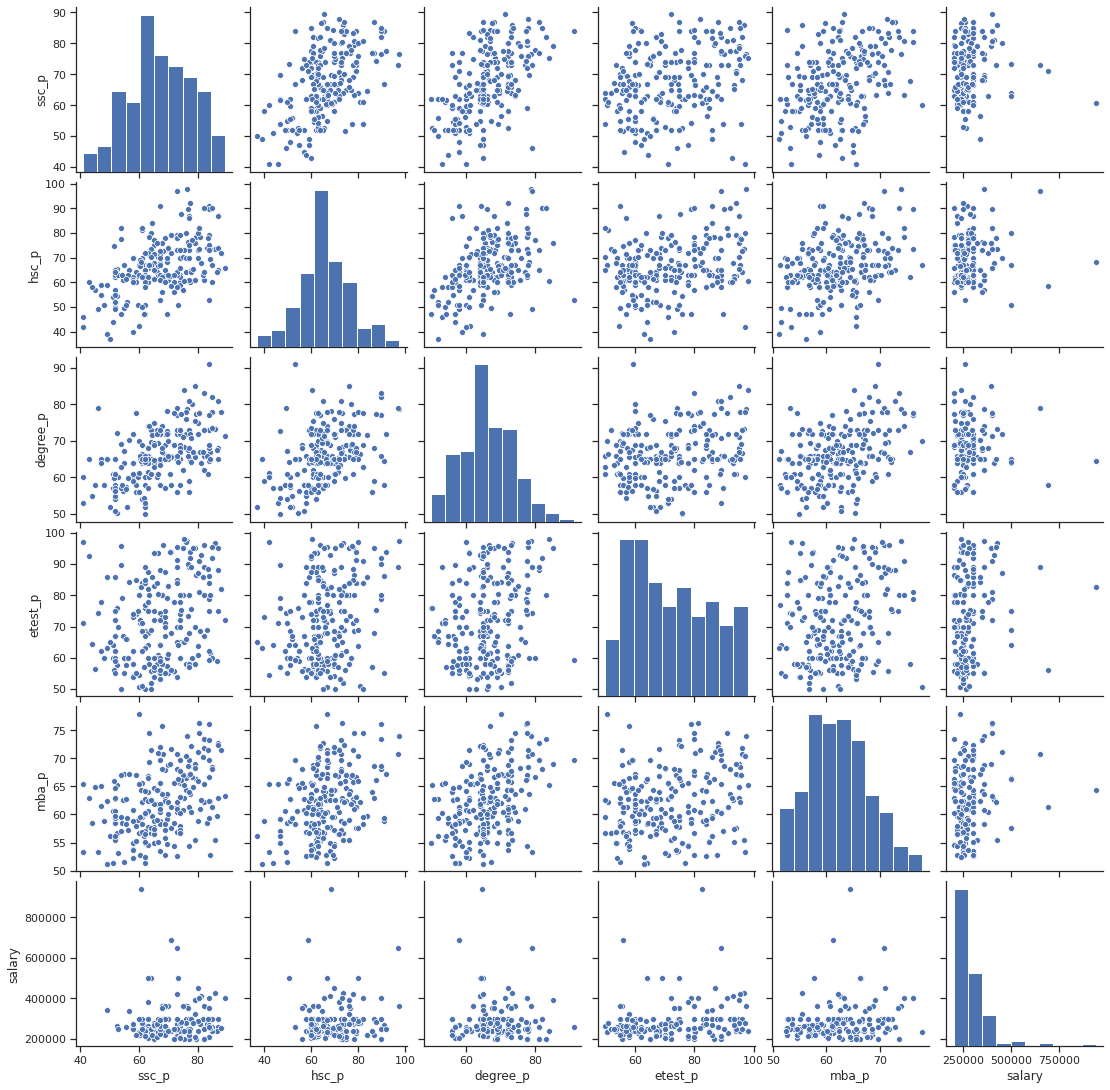

In [99]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df1)

In [100]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

In [108]:
df.loc[df['status']=='Not Placed', 'status'] = 0
df.loc[df['status']=='Placed', 'status'] = 1
df.loc[df['degree_t']=='Sci&Tech','degree_t'] = 0
df.loc[df['degree_t']=='Comm&Mgmt','degree_t'] = 1
df.loc[df['degree_t']=='Others','degree_t'] = 2
df.loc[df['gender']=='M','gender'] = 0
df.loc[df['gender']=='F','gender'] = 1
df.loc[df['ssc_b']=='Others','ssc_b'] = 0
df.loc[df['ssc_b']=='Central','ssc_b'] = 1
df.loc[df['hsc_b']=='Others','hsc_b'] = 0
df.loc[df['hsc_b']=='Central','hsc_b'] = 1
df.loc[df['ssc_b']=='Others','ssc_b'] = 0
df.loc[df['ssc_b']=='Central','ssc_b'] = 1
df.loc[df['workex']=='No','workex'] = 0
df.loc[df['workex']=='Yes','workex'] = 1

df['workex'].astype(int)
df['ssc_b'].astype(int)
df['hsc_b'].astype(int)
df['gender'].astype(int)
df['degree_t'].astype(int)



0      0
1      0
2      1
3      0
4      1
      ..
210    1
211    0
212    1
213    1
214    1
Name: degree_t, Length: 215, dtype: int64

In [109]:
x = df.drop(['status','salary','sl_no','hsc_s','specialisation'],axis=1)
y=df['status'].astype(int)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [110]:
seed=7
models = []
models.append(('RF',RandomForestClassifier()))
models.append(('SVM',SVC()))
models.append(('LR',LogisticRegression()))
models.append(('NB',GaussianNB()))
# Evaluating each models in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.838235 (0.093862)
SVM: 0.813603 (0.088450)
LR: 0.831618 (0.119084)
NB: 0.806985 (0.086538)


**Logistic Regression**

In [111]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)
print(classification_report(y_test,y_pred))
accuracy1=logistic.score(x_test,y_test)
print (accuracy1*100,'%')


              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.95      0.95      0.95        37

    accuracy                           0.93        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.93      0.93      0.93        54

92.5925925925926 %


**SVM**

In [112]:
classifier=SVC()
classifier.fit(x_train,y_train)
svm_predict=classifier.predict(x_test)
print(classification_report(y_test,svm_predict))
accuracy2=classifier.score(x_test,y_test)
print(accuracy2*100,'%')

              precision    recall  f1-score   support

           0       0.83      0.59      0.69        17
           1       0.83      0.95      0.89        37

    accuracy                           0.83        54
   macro avg       0.83      0.77      0.79        54
weighted avg       0.83      0.83      0.82        54

83.33333333333334 %


**Randon forest classifier**

In [113]:
ran_class=RandomForestClassifier()
ran_class.fit(x_train,y_train)
ran_predict=ran_class.predict(x_test)
print(classification_report(y_test,ran_predict))
accuracy3=ran_class.score(x_test,y_test)
print(accuracy3*100,'%')

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.89      0.92      0.91        37

    accuracy                           0.87        54
   macro avg       0.85      0.84      0.85        54
weighted avg       0.87      0.87      0.87        54

87.03703703703704 %
